In [ ]:
!pip install pandas matplotlib seaborn numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

transport_col = 'Transportation type'
transportation_cost_col = 'Transportation cost'
duration_col = 'Duration (days)'
accomodation_cost_col = 'Accommodation cost'
accomodation_type_col = 'Accommodation type'
destination_col = 'Destination'
traveler_age_col = 'Traveler age'
traveler_gender_col = 'Traveler gender'
end_date_col = 'End date'
start_date_col = 'Start date'

def clean_cost(cost):
    if pd.isna(cost):
        return np.nan
    cleaned_string = re.sub(r'[^\d.]', '', str(cost))
    if not cleaned_string:
        return np.nan
    return float(cleaned_string)


df = pd.read_csv("Travel details dataset.csv")

# Trabalho Final (DCC001) - Análise de Dados de Viagens Globais
## Introdução à Programação de Computadores 
### Aluno: José Eduardo Fernandes Lolli


* Dataset: [Traveler-trip-data](https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data)

* Motivação: Aplicar os conhecimentos de análise e manipulação de dados com Python para explorar tendências e padrões a respeito de viagens globais. A motivação vem do interesse pessoal sobre viagens e como fatores geográficos e financeiros se relacionam com as escolhas e a duração de viagens.

-----------------



### Quais são os 10 destinos mais visitados pelos viajantes segundo o dataset?


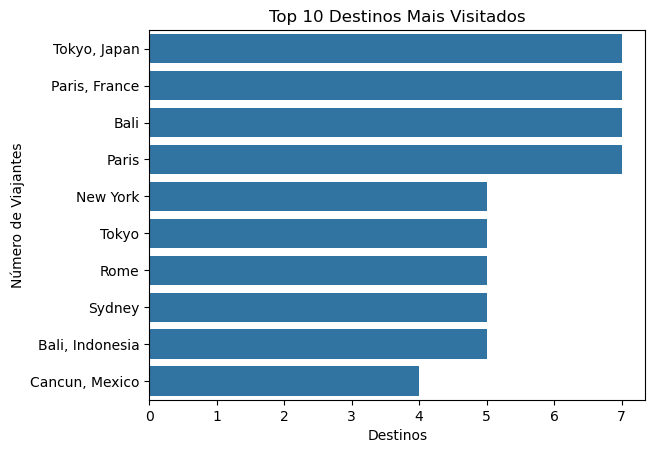

In [15]:
plt.title('Top 10 Destinos Mais Visitados')
plt.xlabel('Destinos')
plt.ylabel('Número de Viajantes')
top_destinos = df['Destination'].value_counts().head(10)
sns.barplot(y=top_destinos.index, x=top_destinos.values)
plt.show()

-------------------------

### Qual é o meio de transporte mais comum e qual é a relação entre seu custo médio e a duração média da viagem?

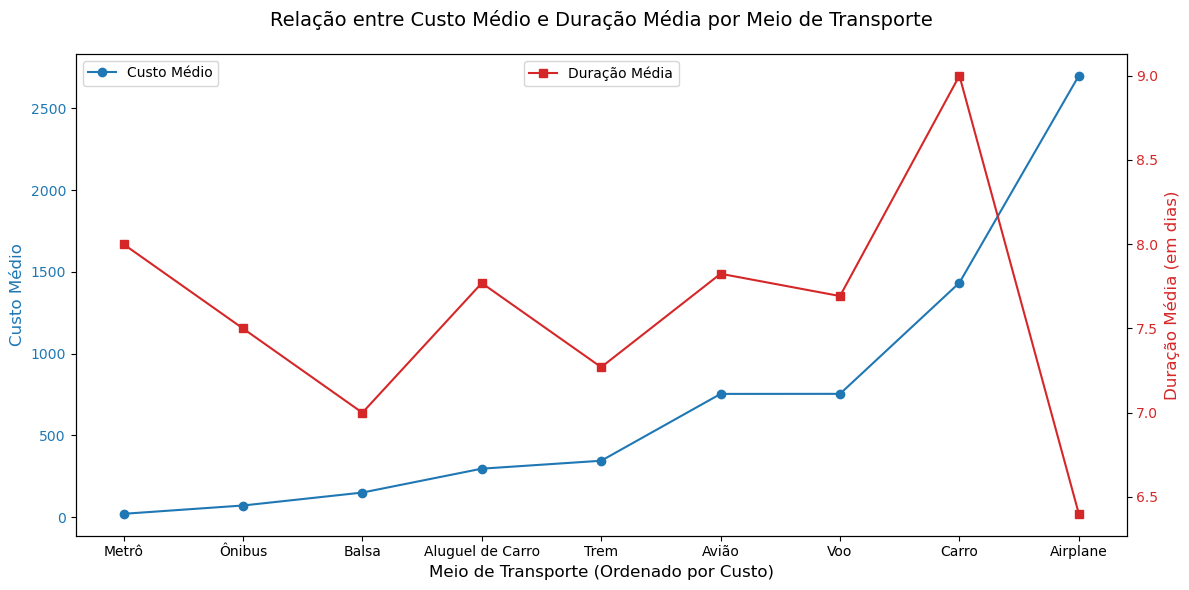

In [16]:
df[transportation_cost_col] = df[transportation_cost_col].apply(clean_cost)

traducao_valores = {
    'Plane': 'Avião',
    'Flight': 'Voo',
    'Bus': 'Ônibus',
    'Car': 'Carro',
    'Train': 'Trem',
    'Car rental': 'Aluguel de Carro',
    'Subway': 'Metrô',
    'Ferry': 'Balsa'
    
}

df[transport_col] = df[transport_col].replace(traducao_valores)

df_clean = df.dropna(subset=[transport_col, transportation_cost_col, duration_col]).copy()

df_medias = df_clean.groupby(transport_col).agg(
    Custo_Medio=(transportation_cost_col, 'mean'),
    Duracao_Media=(duration_col, 'mean')
).reset_index()

df_medias_sorted = df_medias.sort_values(by='Custo_Medio', ascending=True).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

color_cost = 'tab:blue'
ax1.set_xlabel('Meio de Transporte (Ordenado por Custo)', fontsize=12)
ax1.set_ylabel('Custo Médio', color=color_cost, fontsize=12)
ax1.plot(df_medias_sorted[transport_col], df_medias_sorted['Custo_Medio'], color=color_cost, marker='o', label='Custo Médio')
ax1.tick_params(axis='y', labelcolor=color_cost)

ax2 = ax1.twinx()

color_duration = 'tab:red'
ax2.set_ylabel('Duração Média (em dias)', color=color_duration, fontsize=12)
ax2.plot(df_medias_sorted[transport_col], df_medias_sorted['Duracao_Media'], color=color_duration, marker='s', label='Duração Média')
ax2.tick_params(axis='y', labelcolor=color_duration)

plt.title('Relação entre Custo Médio e Duração Média por Meio de Transporte', fontsize=14, pad=20)
ax1.legend(loc=2)
ax2.legend(loc=9) 
fig.tight_layout()
plt.show()

-------------------------

### Qual é o custo médio e quais destinos ou tipos de acomodação são mais "caros" ou "econômicos" por dia?

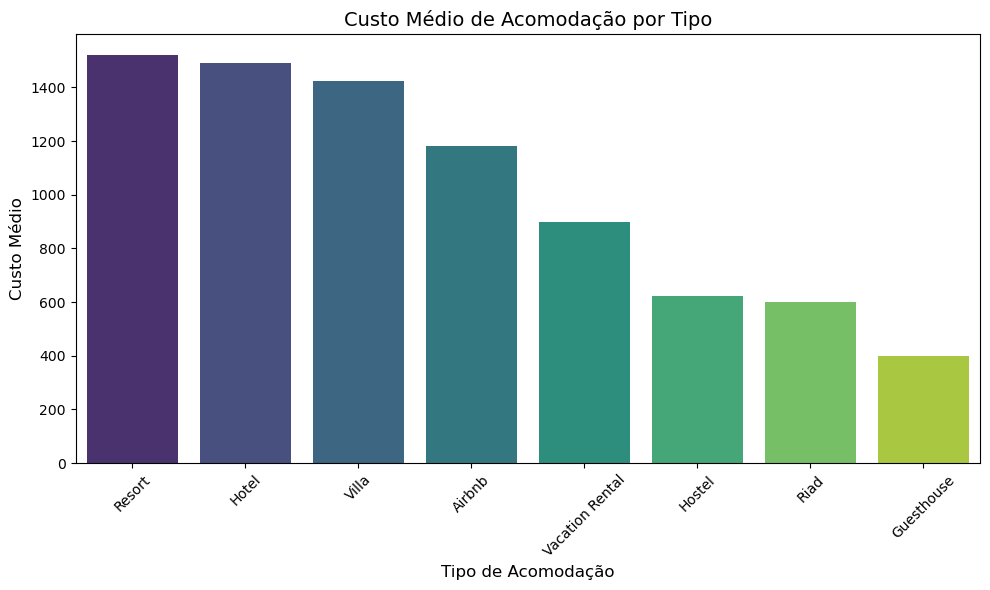

In [17]:
df[accomodation_cost_col] = df[accomodation_cost_col].apply(clean_cost)
dict_custos = {
    'Hotel': np.nanmean(df[df[accomodation_type_col] == 'Hotel'][accomodation_cost_col]),
    'Hostel': np.nanmean(df[df[accomodation_type_col] == 'Hostel'][accomodation_cost_col]),
    'Airbnb': np.nanmean(df[df[accomodation_type_col] == 'Airbnb'][accomodation_cost_col]),
    'Guesthouse': np.nanmean(df[df[accomodation_type_col] == 'Guesthouse'][accomodation_cost_col]),
    'Resort': np.nanmean(df[df[accomodation_type_col] == 'Resort'][accomodation_cost_col]),
    'Villa': np.nanmean(df[df[accomodation_type_col] == 'Villa'][accomodation_cost_col]),
    'Vacation Rental': np.nanmean(df[df[accomodation_type_col] == 'Vacation rental'][accomodation_cost_col]),
    'Riad': np.nanmean(df[df[accomodation_type_col] == 'Riad'][accomodation_cost_col]),
}
labels = list(dict_custos.keys())
pairs = sorted(dict_custos.items(), key=lambda x: np.nan_to_num(x[1], nan=-np.inf), reverse=True)
labels = [p[0] for p in pairs]
values = [p[1] for p in pairs]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis', legend=False, hue=labels)
plt.title('Custo Médio de Acomodação por Tipo', fontsize=14)
plt.xlabel('Tipo de Acomodação', fontsize=12)
plt.ylabel('Custo Médio', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




-------------------------


### Quais são as viagens com os maiores custos totais e o que as torna caras?

In [18]:
custo_total = df.assign(
    Total_Cost=df[accomodation_cost_col] + df[transportation_cost_col]
    ).sort_values(by='Total_Cost', ascending=False
    ).head(5)[[destination_col, accomodation_type_col, accomodation_cost_col, transportation_cost_col, 'Total_Cost']]

custo_total.head(5)

,Destination,Accommodation type,Accommodation cost,Transportation cost,Total_Cost
133,"New York City, USA",Hotel,8000.0,2500.0,10500.0
138,"Auckland, New Zealand",Hotel,7000.0,2500.0,9500.0
131,"Sydney, Australia",Hotel,6000.0,3000.0,9000.0
129,"Tokyo, Japan",Airbnb,7000.0,1500.0,8500.0
137,"Barcelona, Spain",Airbnb,6000.0,2500.0,8500.0


----------------------


### Existe uma correlação entre a idade e gênero do viajante e a duração da viagem?

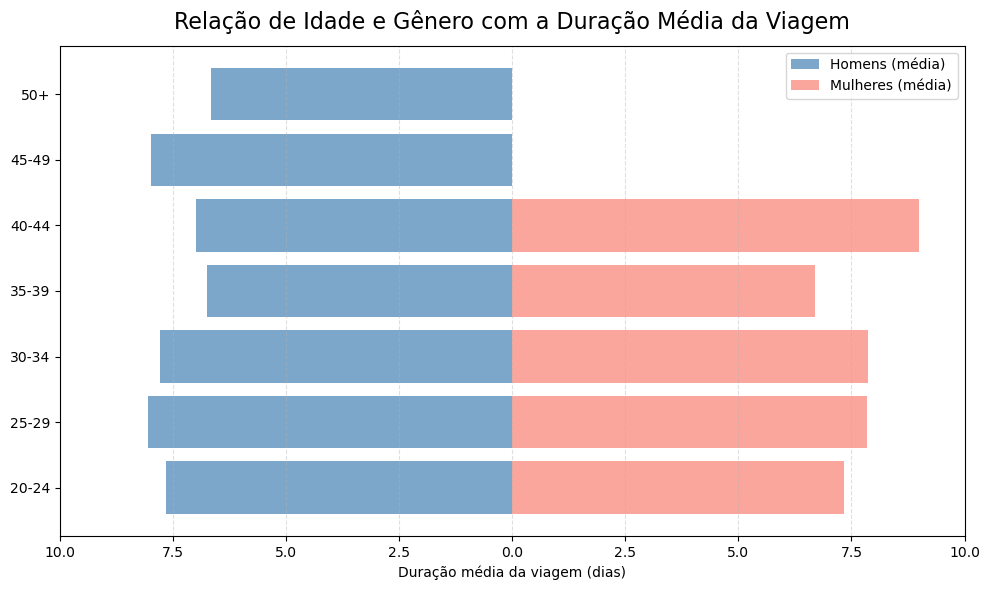

In [20]:
faixas_etarias = [ '20-24', '25-29', '30-34', '35-39','40-44', '45-49', '50+']

bins = [20, 25, 30, 35, 40, 45, 50, 200]

male = df[df[traveler_gender_col] == 'Male'].copy()
female = df[df[traveler_gender_col] == 'Female'].copy()


male['age_bin'] = pd.cut(male[traveler_age_col], bins=bins, labels=faixas_etarias, right=False)
female['age_bin'] = pd.cut(female[traveler_age_col], bins=bins, labels=faixas_etarias, right=False)

male_means = male.groupby('age_bin', observed=False)[duration_col].mean().reindex(faixas_etarias).fillna(0)
female_means = female.groupby('age_bin', observed=False)[duration_col].mean().reindex(faixas_etarias).fillna(0)

y = np.arange(len(faixas_etarias))

fig, ax = plt.subplots(figsize=(10, 6))


ax.barh(y, -male_means.values, color='steelblue', alpha=0.7, label='Homens (média)')
ax.barh(y, female_means.values, color='salmon', alpha=0.7, label='Mulheres (média)')

ax.set_yticks(y)
ax.set_yticklabels(faixas_etarias)
ax.set_xlabel('Duração média da viagem (dias)')
ax.set_title("Relação de Idade e Gênero com a Duração Média da Viagem", fontsize=16, pad=12)
ax.legend()

xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([abs(float(x)) for x in xticks])

plt.grid(axis='x', ls='--', alpha=0.4)
plt.tight_layout()
plt.show()